In [1]:
from kmodes.kmodes import KModes
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes

In [2]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.tail()

,ID,Sex,Marital Status,Age,Education,Income,Occupation,Settlement Size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [4]:
#We don't have any null data, see:
df.isnull().sum()

ID                 0
Sex                0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64

In [5]:
#Income and Age Data Normalization
#Before Scaling/Normalization we keep our normal values in temp variables
df_temp = df[['ID', 'Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [6]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [7]:
#Drop ID before analysis
#Since ID is not used in analysis
df = df.drop(['ID'], axis=1)

In [8]:
mark_array = df.values
mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [9]:
df.head()

,Sex,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [10]:
#Build our model
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical = [0, 1, 3, 5, 6])
print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 749, ncost: 165.55715598110737
Run: 1, iteration: 2/20, moves: 364, ncost: 159.86552969695256
Run: 1, iteration: 3/20, moves: 47, ncost: 159.64466107428962
Run: 1, iteration: 4/20, moves: 4, ncost: 159.64166840806612
Run: 1, iteration: 5/20, moves: 1, ncost: 159.64165243166184
Run: 1, iteration: 6/20, moves: 0, ncost: 159.64165243166184
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 729, ncost: 186.48454531741933
Run: 2, iteration: 2/20, moves: 371, ncost: 179.4153572685592
Run: 2, iteration: 3/20, moves: 198, ncost: 172.16474187305715
Run: 2, iteration: 4/20, moves: 70, ncost: 171.91755338817984
Run: 2, iteration: 5/20, moves: 12, ncost: 171.87225530762726
Run: 2, iteration: 6/20, moves: 5, ncost: 171.8596899875025
Run: 2, iteration: 7/

10

In [11]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)

df['Cluster'] = cluster_dict

#Put original coumns from temp to df:
df[['ID', 'Age', 'Income']] =  df_temp

In [12]:
df[df['Cluster']== 0].head(10)

,Sex,Marital Status,Age,Education,Income,Occupation,Settlement Size,Cluster,ID
0,0,0,67,2,124670,1,2,0,100000001
16,0,0,53,1,125550,1,0,0,100000017
23,0,0,44,1,134918,1,2,0,100000024
29,0,0,63,2,175882,1,0,0,100000030
56,0,0,52,1,202575,2,2,0,100000057
68,0,0,37,1,106978,1,2,0,100000069
72,0,0,51,1,141858,2,2,0,100000073
75,0,0,66,2,157299,2,2,0,100000076
77,0,0,51,1,155486,1,2,0,100000078
94,0,0,54,1,165230,1,2,0,100000095


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

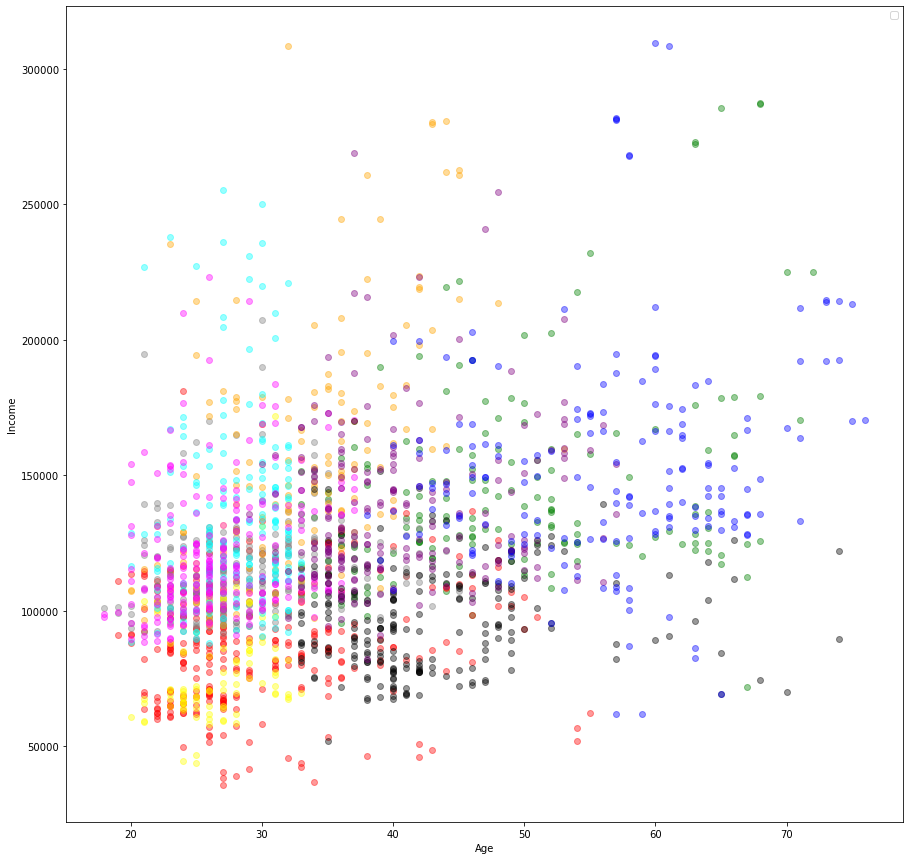

In [17]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]
df6 = df[df.Cluster == 5]
df7 = df[df.Cluster == 6]
df8 = df[df.Cluster == 7]
df9 = df[df.Cluster == 8]
df10 = df[df.Cluster == 9]

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'], color = 'green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'], color = 'red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'], color = 'gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'], color = 'orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'], color = 'yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'], color = 'cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'], color = 'magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'], color = 'black', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'], color = 'purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'], color = 'blue', alpha = 0.4)

plt.legend()
plt.show